In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import re
from datetime import datetime

In [2]:
with open("purchases.txt","r") as f:
    a=f.readlines()

In [3]:
d=[]
for i in a:
    s=re.split(r"[\t\n]",i)[:-1]
    d.append(s)

In [4]:
d

[['760', '25', '2009-11-06'],
 ['860', '50', '2012-09-28'],
 ['1200', '100', '2005-10-25'],
 ['1420', '50', '2009-07-09'],
 ['1940', '70', '2013-01-25'],
 ['1960', '40', '2013-10-29'],
 ['2620', '30', '2006-03-09'],
 ['3050', '50', '2007-04-12'],
 ['3120', '150', '2006-11-08'],
 ['3260', '45', '2010-10-20'],
 ['3510', '35', '2013-05-04'],
 ['3970', '30', '2007-06-07'],
 ['4000', '20', '2005-11-25'],
 ['4180', '20', '2010-09-22'],
 ['4390', '30', '2011-04-15'],
 ['4750', '60', '2013-12-02'],
 ['4840', '30', '2005-10-14'],
 ['4910', '15', '2006-12-13'],
 ['4950', '50', '2010-05-19'],
 ['4970', '30', '2006-12-01'],
 ['5250', '50', '2005-12-20'],
 ['5480', '100', '2014-06-06'],
 ['5990', '30', '2006-03-17'],
 ['6240', '100', '2006-11-09'],
 ['6390', '15', '2005-10-25'],
 ['6570', '30', '2012-11-10'],
 ['6600', '50', '2005-09-23'],
 ['6690', '20', '2010-03-10'],
 ['6690', '15', '2010-11-04'],
 ['6690', '15', '2013-12-10'],
 ['6710', '80', '2013-05-03'],
 ['6940', '30', '2013-12-31'],
 ['700

In [5]:
len(d)

51243

In [6]:
df=pd.DataFrame(d)

In [7]:
df.columns=["Customer_id","Purchase_Amt","Date"]

In [8]:
df

,Customer_id,Purchase_Amt,Date
0,760,25,2009-11-06
1,860,50,2012-09-28
2,1200,100,2005-10-25
3,1420,50,2009-07-09
4,1940,70,2013-01-25
...,...,...,...
51238,163230,30,2011-11-12
51239,154410,100,2013-11-15
51240,189270,30,2014-12-23
51241,173810,30,2015-05-28


In [9]:
df.Date=pd.to_datetime(df.Date)

In [10]:
df

,Customer_id,Purchase_Amt,Date
0,760,25,2009-11-06
1,860,50,2012-09-28
2,1200,100,2005-10-25
3,1420,50,2009-07-09
4,1940,70,2013-01-25
...,...,...,...
51238,163230,30,2011-11-12
51239,154410,100,2013-11-15
51240,189270,30,2014-12-23
51241,173810,30,2015-05-28


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Customer_id   51243 non-null  object        
 1   Purchase_Amt  51243 non-null  object        
 2   Date          51243 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 800.7+ KB


In [12]:
df["Customer_id"]=df["Customer_id"].apply(lambda x:float(x))
df["Purchase_Amt"]=df["Purchase_Amt"].apply(lambda x:float(x))

In [13]:
df1=df.copy()

In [14]:
df1.index=df1.Date

In [15]:
df1

,Customer_id,Purchase_Amt,Date
Date,,,
2009-11-06,760.0,25.0,2009-11-06
2012-09-28,860.0,50.0,2012-09-28
2005-10-25,1200.0,100.0,2005-10-25
2009-07-09,1420.0,50.0,2009-07-09
2013-01-25,1940.0,70.0,2013-01-25
...,...,...,...
2011-11-12,163230.0,30.0,2011-11-12
2013-11-15,154410.0,100.0,2013-11-15
2014-12-23,189270.0,30.0,2014-12-23


In [16]:
df1["Purchase_Amt"].describe()

count    51243.000000
mean        62.337195
std        156.606801
min          5.000000
25%         25.000000
50%         30.000000
75%         60.000000
max       4500.000000
Name: Purchase_Amt, dtype: float64

<AxesSubplot:xlabel='Date'>

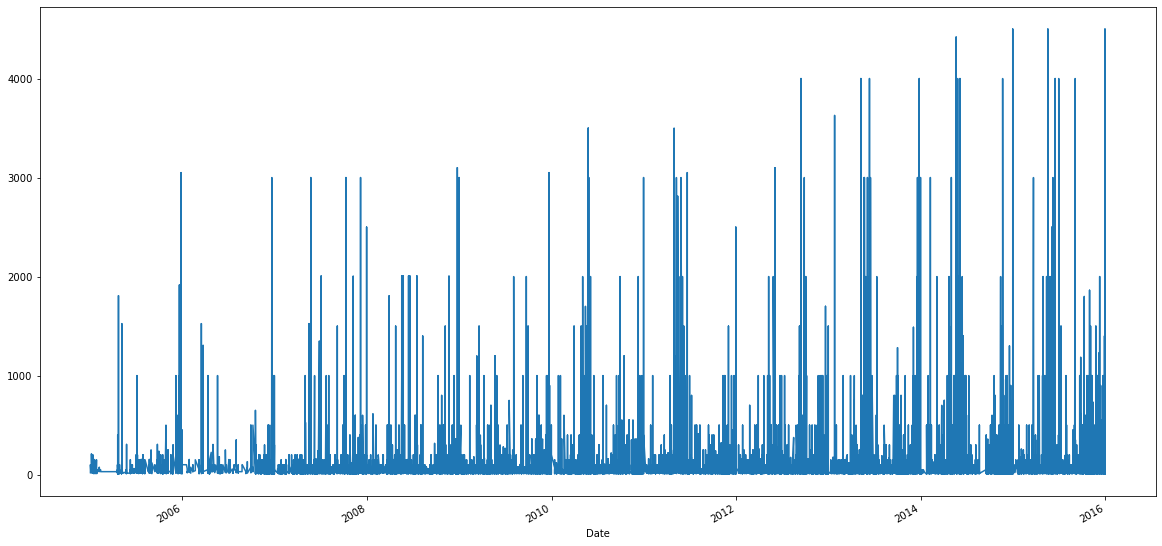

In [17]:
df1["Purchase_Amt"].plot()

<AxesSubplot:xlabel='Date'>

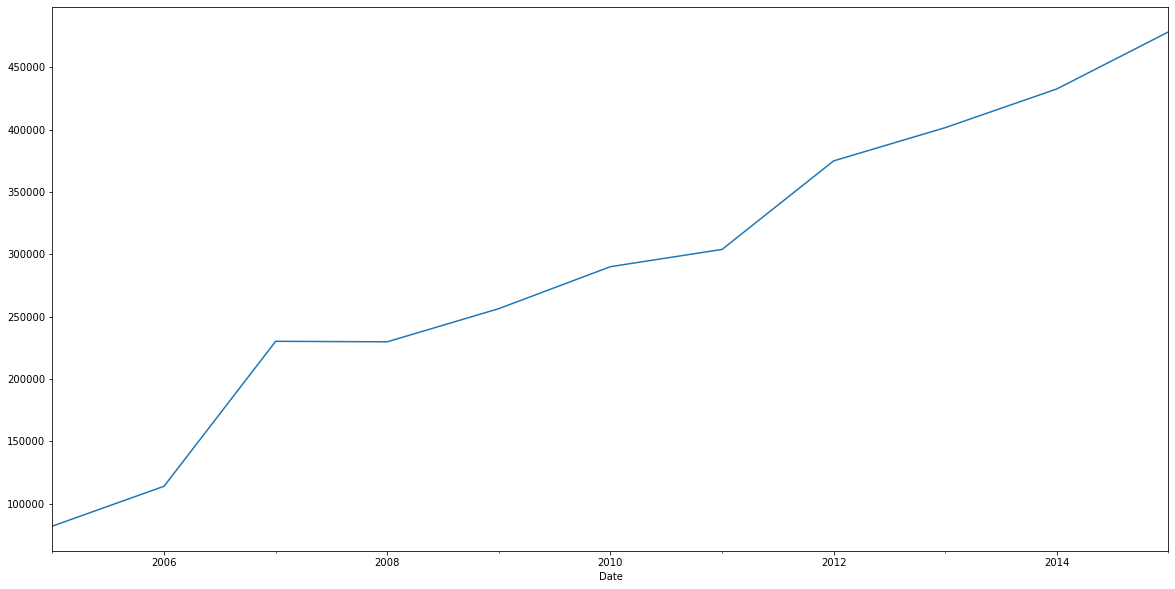

In [18]:
df1.resample("Y")["Purchase_Amt"].sum().plot()

In [19]:
df1["Year"]=df1.Date.dt.year

<AxesSubplot:xlabel='Year'>

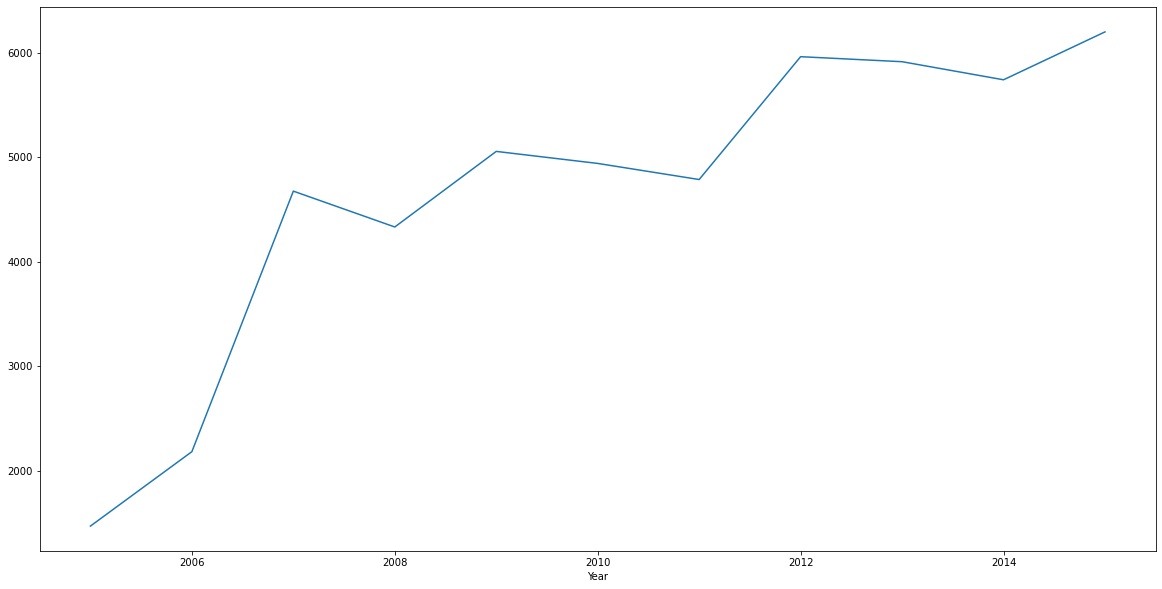

In [20]:
df1.groupby("Year")["Year"].count().plot()

<AxesSubplot:xlabel='Year'>

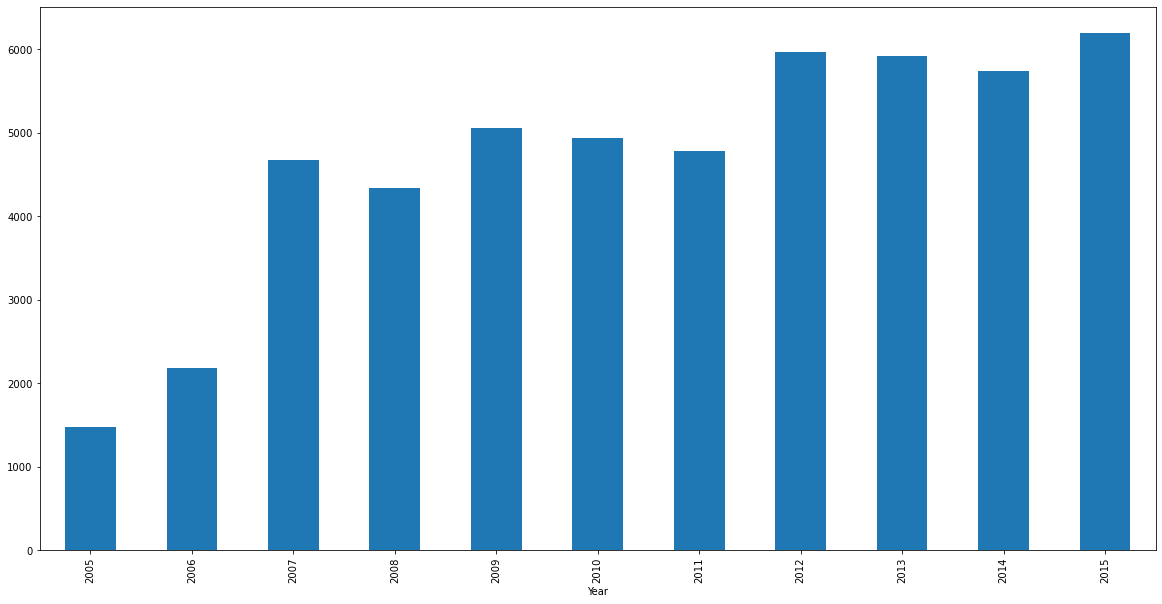

In [21]:
df1.groupby("Year")["Year"].count().plot.bar()

In [22]:
df1.groupby(["Customer_id","Year"])["Customer_id"].count()

Customer_id  Year
10.0         2005    1
80.0         2005    1
             2007    1
             2009    1
             2011    1
                    ..
263820.0     2015    1
263870.0     2015    1
263880.0     2015    1
263890.0     2015    1
264200.0     2015    1
Name: Customer_id, Length: 44966, dtype: int64

<AxesSubplot:xlabel='Year'>

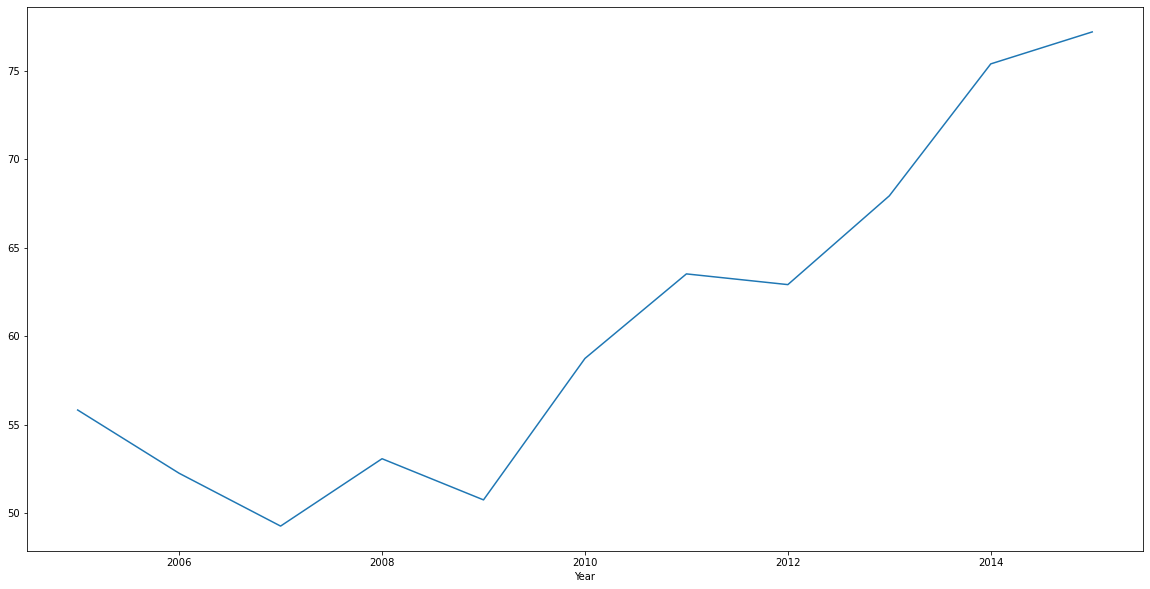

In [23]:
df1.groupby("Year")["Purchase_Amt"].mean().plot()

<AxesSubplot:xlabel='Date'>

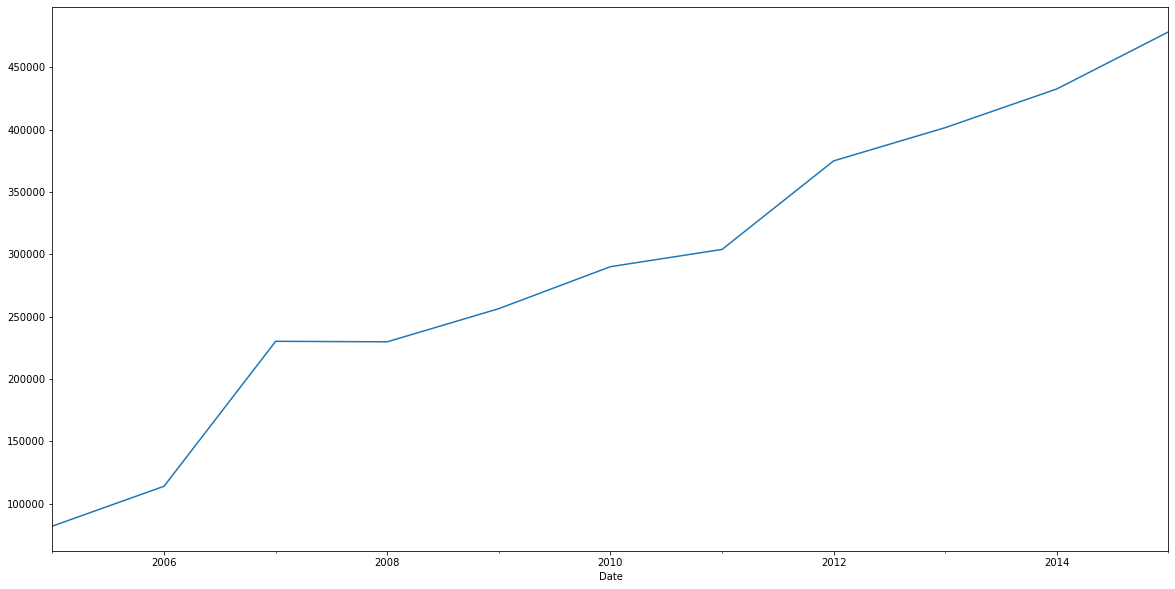

In [24]:
df1.resample("Y")["Purchase_Amt"].sum().plot()

In [25]:
customer=df1.groupby(["Customer_id"]).agg({"Customer_id":"count","Purchase_Amt":"mean","Date":"max"})

In [26]:
customer

,Customer_id,Purchase_Amt,Date
Customer_id,,,
10.0,1,30.000000,2005-07-08
80.0,7,71.428571,2015-01-23
90.0,10,115.800000,2013-12-04
120.0,1,20.000000,2012-03-01
130.0,2,50.000000,2007-11-14
...,...,...,...
263820.0,1,10.000000,2015-12-31
263870.0,1,50.000000,2015-08-19
263880.0,1,20.000000,2015-11-28


In [27]:
def d(date):
    return(datetime(2016,1,1)-date).days

In [28]:
customer["Recency"]=customer["Date"].apply(d)

In [29]:
customer.columns=["no_of_transactions","Average Value","Last visited","Recency"]

In [30]:
customer

,no_of_transactions,Average Value,Last visited,Recency
Customer_id,,,,
10.0,1,30.000000,2005-07-08,3829
80.0,7,71.428571,2015-01-23,343
90.0,10,115.800000,2013-12-04,758
120.0,1,20.000000,2012-03-01,1401
130.0,2,50.000000,2007-11-14,2970
...,...,...,...,...
263820.0,1,10.000000,2015-12-31,1
263870.0,1,50.000000,2015-08-19,135
263880.0,1,20.000000,2015-11-28,34


In [31]:
customer.sort_values("no_of_transactions",ascending=False)

,no_of_transactions,Average Value,Last visited,Recency
Customer_id,,,,
9720.0,45,44.555556,2015-12-03,29
109370.0,41,16.951220,2015-12-31,1
119430.0,38,14.760526,2015-03-06,301
10720.0,37,26.216216,2015-11-28,34
10640.0,34,16.564706,2015-11-26,36
...,...,...,...,...
140980.0,1,15.000000,2010-05-25,2047
141020.0,1,10.000000,2010-05-26,2046
141050.0,1,40.000000,2010-05-26,2046


In [32]:
c=customer.iloc[:,[0,1,-1]]

In [33]:
c.columns=["Frequency","Monetory_Value","Recency"]

In [34]:
c

,Frequency,Monetory_Value,Recency
Customer_id,,,
10.0,1,30.000000,3829
80.0,7,71.428571,343
90.0,10,115.800000,758
120.0,1,20.000000,1401
130.0,2,50.000000,2970
...,...,...,...
263820.0,1,10.000000,1
263870.0,1,50.000000,135
263880.0,1,20.000000,34


In [35]:
c.describe()

,Frequency,Monetory_Value,Recency
count,18417.000000,18417.000000,18417.000000
mean,2.782375,57.792985,1253.037900
std,2.936888,154.360109,1081.437868
min,1.000000,5.000000,1.000000
25%,1.000000,21.666667,244.000000
50%,2.000000,30.000000,1070.000000
75%,3.000000,50.000000,2130.000000
max,45.000000,4500.000000,4014.000000


<AxesSubplot:>

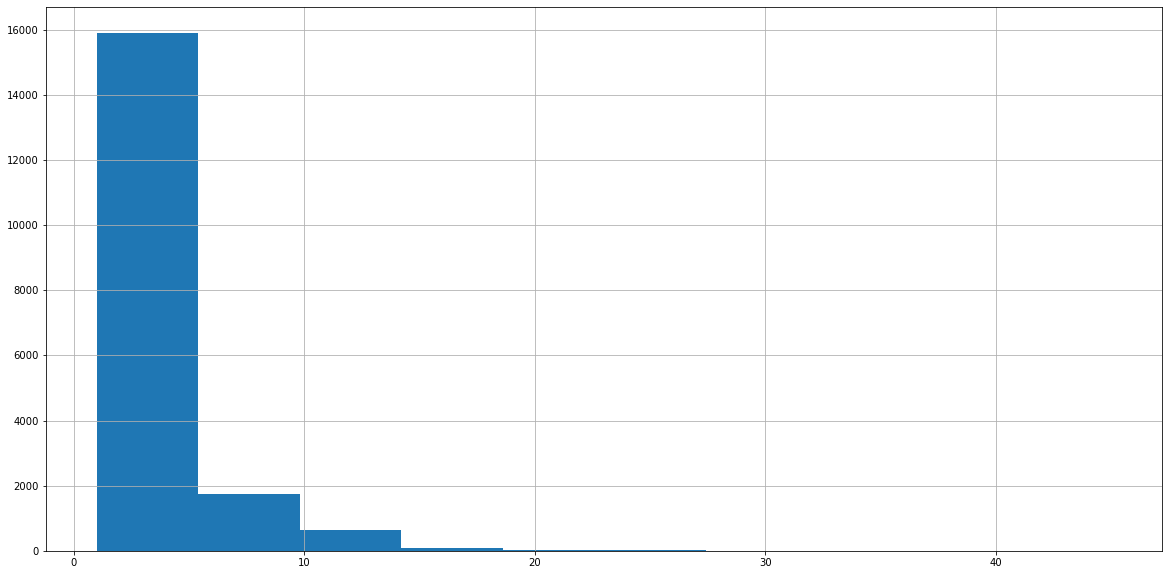

In [36]:
c["Frequency"].hist()

<AxesSubplot:>

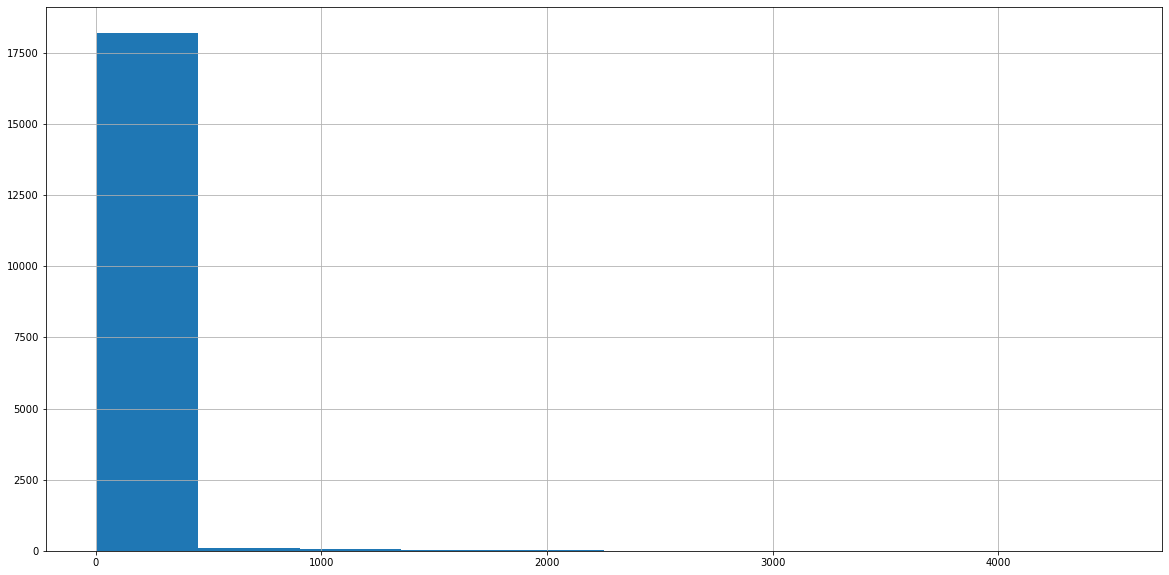

In [37]:
c["Monetory_Value"].hist()

<AxesSubplot:>

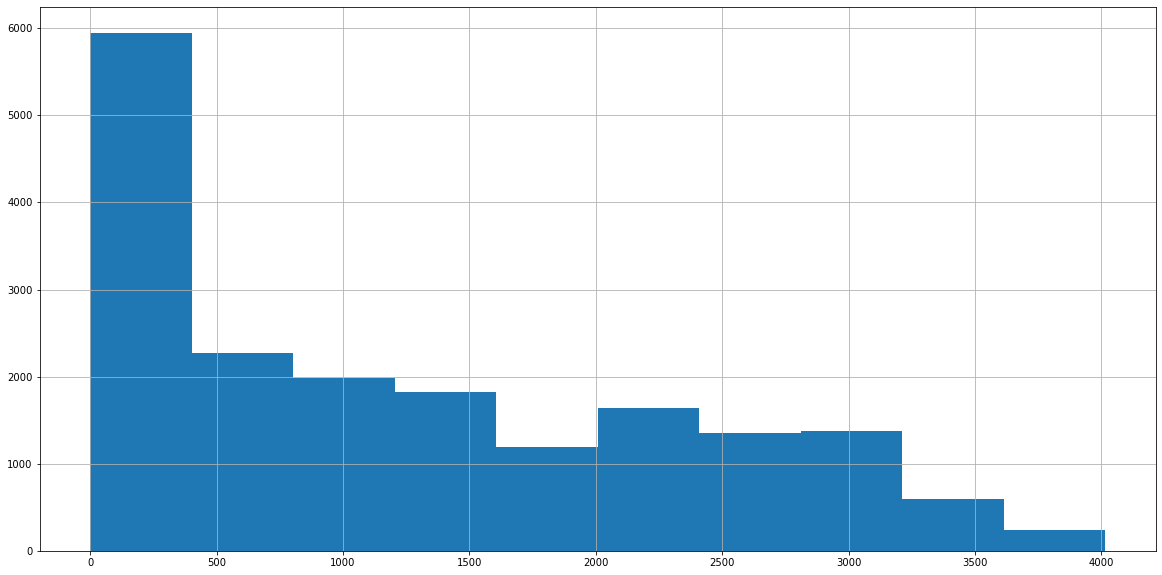

In [38]:
c["Recency"].hist()

In [39]:
c.describe()

,Frequency,Monetory_Value,Recency
count,18417.000000,18417.000000,18417.000000
mean,2.782375,57.792985,1253.037900
std,2.936888,154.360109,1081.437868
min,1.000000,5.000000,1.000000
25%,1.000000,21.666667,244.000000
50%,2.000000,30.000000,1070.000000
75%,3.000000,50.000000,2130.000000
max,45.000000,4500.000000,4014.000000


In [40]:
stat=c.describe().loc["25%":"75%"]

In [41]:
stat

,Frequency,Monetory_Value,Recency
25%,1.0,21.666667,244.0
50%,2.0,30.000000,1070.0
75%,3.0,50.000000,2130.0


In [42]:
s1=stat.to_dict()

In [43]:
s1

{'Frequency': {'25%': 1.0, '50%': 2.0, '75%': 3.0},
 'Monetory_Value': {'25%': 21.666666666666668, '50%': 30.0, '75%': 50.0},
 'Recency': {'25%': 244.0, '50%': 1070.0, '75%': 2130.0}}

In [44]:
p="25%"
q="50%"
r="75%"
freq=s1["Frequency"]
mval=s1["Monetory_Value"]
rval=s1["Recency"]

In [45]:
def score_calculator1(row):
    fscore=0
    mscore=0
    rscore=0
    f=row[0]
    if(f<=freq[p]):
        fscore=1
    elif(f<=freq[q]):
        fscore=2
    elif(f<=freq[r]):
        fscore=3
    else:
        fscore=4
        
    m=row[1]
    if(m<=mval[p]):
        mscore=1
    elif(m<=mval[q]):
        mscore=2
    elif(m<=mval[r]):
        mscore=3
    else:
        mscore=4
        
    r1=row[2]
    if(r1<=rval[p]):
        rscore=2
    elif(r1<=rval[q]):
        rscore=1
    else:
        rscore=0
    score=fscore+mscore+rscore
    return score

In [46]:
d=pd.Series(c.values.tolist(),index=c.index)

In [47]:
d

Customer_id
10.0                    [1.0, 30.0, 3829.0]
80.0        [7.0, 71.42857142857143, 343.0]
90.0                   [10.0, 115.8, 758.0]
120.0                   [1.0, 20.0, 1401.0]
130.0                   [2.0, 50.0, 2970.0]
                         ...               
263820.0                   [1.0, 10.0, 1.0]
263870.0                 [1.0, 50.0, 135.0]
263880.0                  [1.0, 20.0, 34.0]
263890.0                   [1.0, 54.0, 5.0]
264200.0                  [1.0, 500.0, 1.0]
Length: 18417, dtype: object

In [48]:
c["Score"]=d.apply(score_calculator1)

In [49]:
c

,Frequency,Monetory_Value,Recency,Score
Customer_id,,,,
10.0,1,30.000000,3829,3
80.0,7,71.428571,343,9
90.0,10,115.800000,758,9
120.0,1,20.000000,1401,2
130.0,2,50.000000,2970,5
...,...,...,...,...
263820.0,1,10.000000,1,4
263870.0,1,50.000000,135,6
263880.0,1,20.000000,34,4


In [50]:
c.sort_values(by="Score",ascending=False)

,Frequency,Monetory_Value,Recency,Score
Customer_id,,,,
87240.0,9,56.111111,22,10
58910.0,10,57.000000,22,10
85140.0,5,80.000000,231,10
169530.0,5,210.000000,6,10
117490.0,8,85.000000,50,10
...,...,...,...,...
162610.0,1,20.000000,1514,2
103270.0,1,20.000000,2708,2
162700.0,1,20.000000,1514,2


In [56]:
c.Score.value_counts()

4     3104
5     2808
3     2599
6     2218
2     2107
7     1989
8     1555
9     1189
10     848
Name: Score, dtype: int64

In [51]:
c[c["Score"]==10]

,Frequency,Monetory_Value,Recency,Score
Customer_id,,,,
480.0,12,60.833333,21,10
860.0,10,54.000000,237,10
1020.0,5,68.000000,1,10
1150.0,11,64.090909,10,10
1420.0,34,51.029412,24,10
...,...,...,...,...
219200.0,4,77.500000,6,10
220830.0,4,75.000000,78,10
221280.0,4,88.750000,71,10


<AxesSubplot:xlabel='Score'>

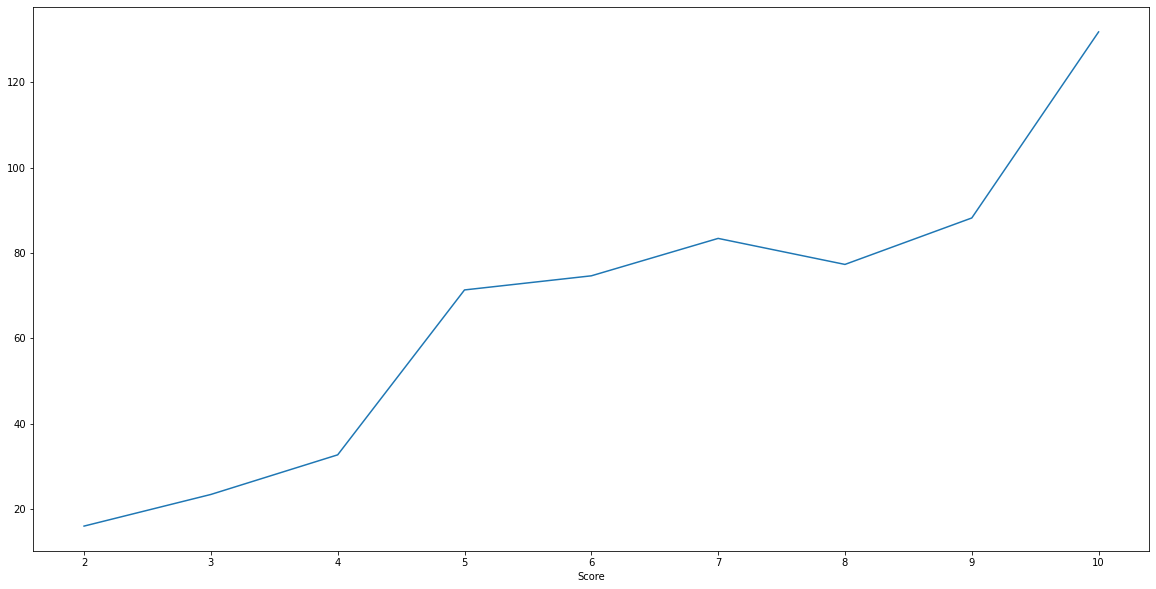

In [52]:
c.groupby("Score")["Monetory_Value"].mean().plot()

<AxesSubplot:xlabel='Score'>

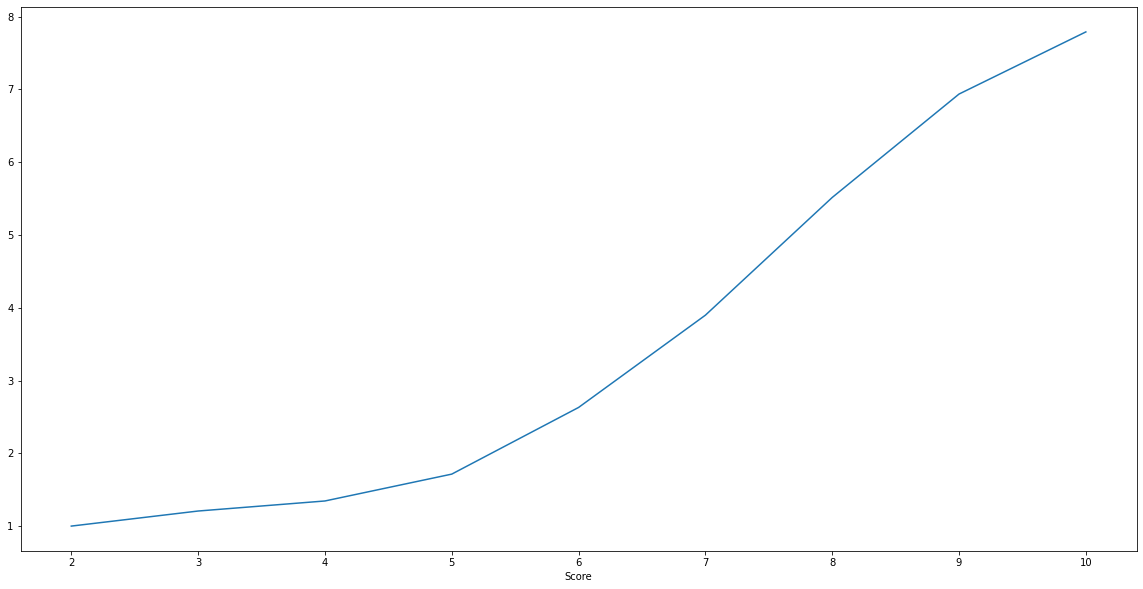

In [53]:
c.groupby("Score")["Frequency"].mean().plot()

<AxesSubplot:xlabel='Score'>

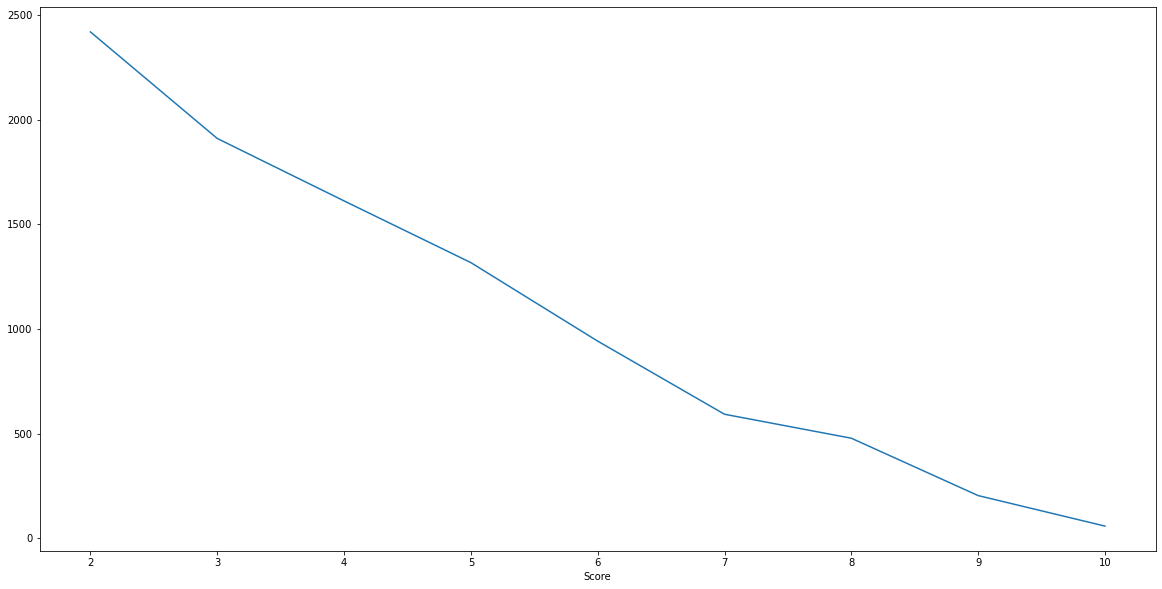

In [54]:
c.groupby("Score")["Recency"].mean().plot()

<AxesSubplot:>

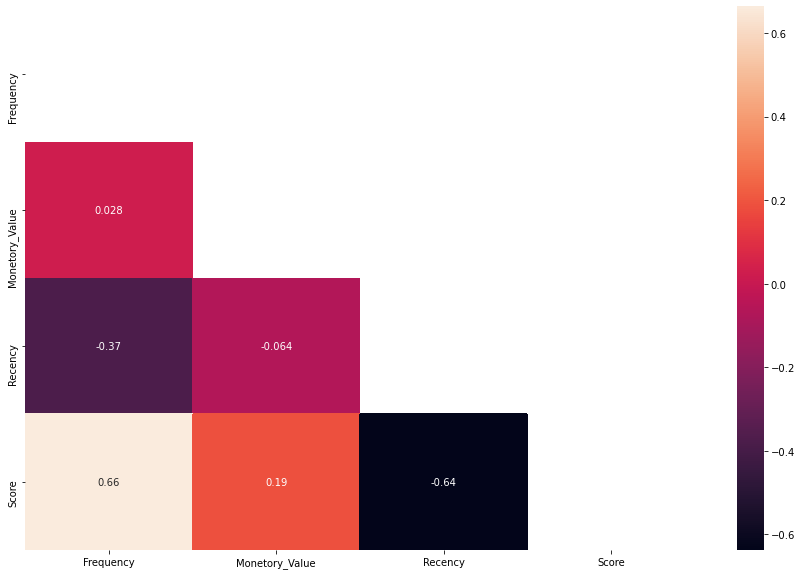

In [55]:
corr=c.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
plt.figure(figsize=(15,10))
sns.heatmap(corr,mask=mask,annot=True)